Patient Data Prediction 
========================
This notebook analyzes the data of large number of patients (approximately 2000). The data contains some demographic and simple measurements (height, weight, etc). The data also second contains
the results of 5 medical tests where the results range from 0 to 100. It also has an indicator of whether or not the patient has a disease (0=yes, 1=no)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [37]:
# Load the dataset 
df_1 = pd.read_csv('../00_raw_data/Data1.txt', sep='\t')
df_2 = pd.read_csv('../00_raw_data/Data2.txt', sep='\t')
df_1.head()
df_2.head()

,id,testA,testB,testC,testD,testE,disease
0,31938,45,60,40,52,38,1
1,31939,30,37,70,53,55,0
2,31940,56,37,71,52,77,0
3,31941,50,63,63,56,59,0
4,31942,48,39,38,54,38,0


In [38]:
# Merge dataset
df = pd.merge(df_1, df_2, how='left', on='id')
df.head()

,id,age,ethnic,income,marital,occGroup,gender,weight,height,heartRate,testA,testB,testC,testD,testE,disease
0,33418,33,1,3,0,1,1,144,65,75.0,48.0,68.0,59.0,45.0,42.0,1.0
1,51079,44,4,2,0,1,0,187,60,64.0,60.0,51.0,45.0,41.0,34.0,0.0
2,41242,46,0,2,1,8,0,175,64,54.0,59.0,58.0,54.0,43.0,30.0,0.0
3,32003,35,1,3,0,5,1,140,65,71.0,41.0,71.0,37.0,56.0,50.0,1.0
4,39742,46,0,0,1,5,0,182,62,NaN,40.0,64.0,50.0,42.0,13.0,1.0


In [39]:
# Get the total number of rows
total_number_rows = df.shape[0]

print(f"Total number of rows: {total_number_rows}")

Total number of rows: 19998


Data Preprocessing
------------------

In [40]:
# Check for duplicates
sum(df.duplicated())

0

In [50]:
# Check for missing values
df.isnull().sum()

age          0
ethnic       0
income       0
marital      0
occGroup     0
gender       0
weight       0
height       0
heartRate    0
testA        0
testB        0
testC        0
testD        0
testE        0
disease      0
dtype: int64

In [42]:
#imputer = SimpleImputer(strategy='median')
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Impute columns with their respective median
df = df.fillna(df.median(numeric_only=True))

# Crosscheck
df.isnull().sum()

id           0
age          0
ethnic       0
income       0
marital      0
occGroup     0
gender       0
weight       0
height       0
heartRate    0
testA        0
testB        0
testC        0
testD        0
testE        0
disease      0
dtype: int64

In [43]:
# Export clean data 
df.to_csv('../03_tidy_data/data.csv', index=False)

Descriptive Statistics
-----------------------

In [44]:
df['age'].describe()

count    19998.000000
mean        42.840034
std          8.607995
min         11.000000
25%         37.000000
50%         44.000000
75%         49.000000
max         76.000000
Name: age, dtype: float64

The minimum age of the patients is 11 years and the maximum age is 76 years. The average age is approximately 43 years. The age distribution is negatively skewed, indicating that there are more younger patients than older ones. The standard deviation of age is around 9 years, suggesting that most patients are within 9 years of the average age.
The first quartile (Q1) is 37 years, suggesting that 25% of the patients are younger than this age. The median age (Q2) is 43 years, indicating that half of the patients are younger than this age. The third quartile (Q3) is 49 years, meaning that 75% of the patients are younger than this age.

Explorartory Data Analysis
-----------------------

Line plot - age and disease

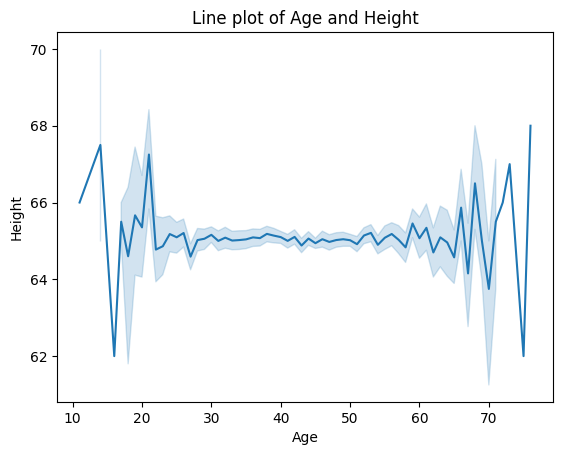

In [21]:
sns.lineplot(data=df, x='age', y='height')
plt.title('Line plot of Age and Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

The lineplot shows the relationship between age and height. The x-axis represents age, while the y-axis represents height. The line plot indicates that as age increases, height does not show a consistent trend. There are fluctuations in height across different ages, suggesting that height may not be directly correlated with age in this dataset.

Line plot - age and weight

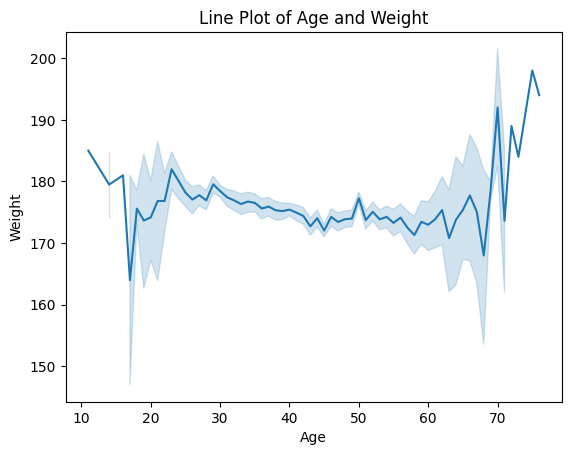

In [22]:
sns.lineplot(data=df, x='age', y='weight')
plt.title('Line Plot of Age and Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

This line plot illustrates the relationship between age and weight. The x-axis represents age, while the y-axis represents weight. The line plot shows that as age increases, weight does not follow a consistent trend. There are fluctuations in weight across different ages, indicating that weight may not be directly correlated with age in this dataset.



Predictive Modeling
---------------

In [85]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Drop 'id' columns
df.drop(columns='id', inplace=True)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('disease', axis = 1), df['disease'], test_size=0.2, random_state=42)

Model Training

Logistic Regression Model

In [54]:
lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [61]:
# Training the model 
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.65575

In [62]:
# Testing the model 
lr_pred =lr.predict(x_test)
accuracy_score(y_test, lr_pred)

0.65575

Feature Importance Logistic Regression Coefficients

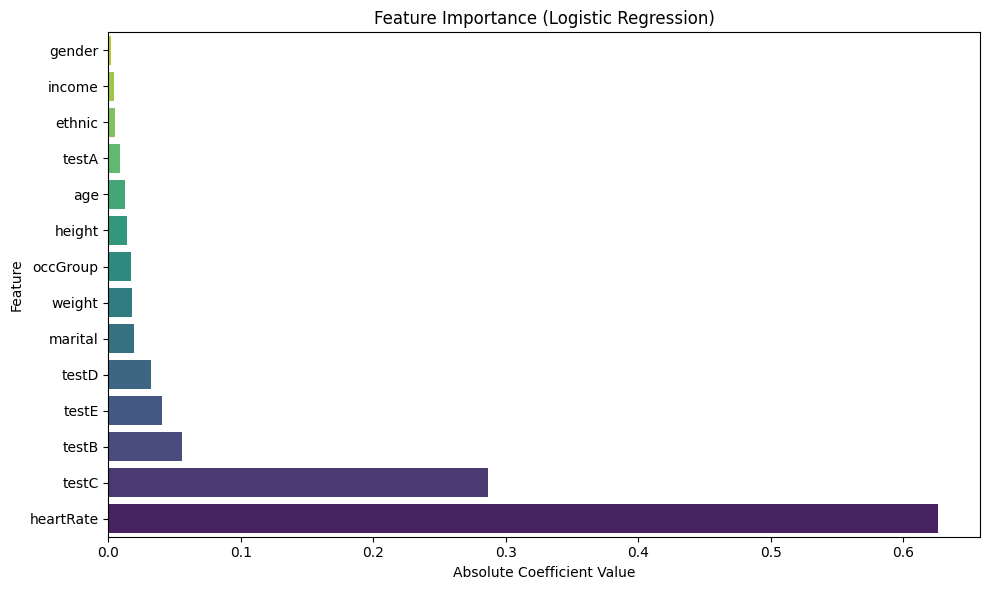

In [89]:
# Extract the Logistic Regression Step
lr_classifier = lr.named_steps['logisticregression']

# Access coefficients
coefficients =  lr_classifier.coef_[0]

# Feature names 
feature_names_lr = x_train.columns

# Combine with feature names 
feature_importance = pd.DataFrame({
    'Feature': feature_names_lr,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10,6))
# plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
sns.barplot(data=feature_importance, y='Feature', x='Abs_Coefficient', palette='viridis')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Decision  Tree Model

In [79]:
dt  = DecisionTreeClassifier()
dt 

DecisionTreeClassifier()

In [80]:
# Training the model 
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.848

In [81]:
# Testing the model
dt_pred = dt.predict(x_test)
accuracy_score(y_test, dt_pred)

0.848

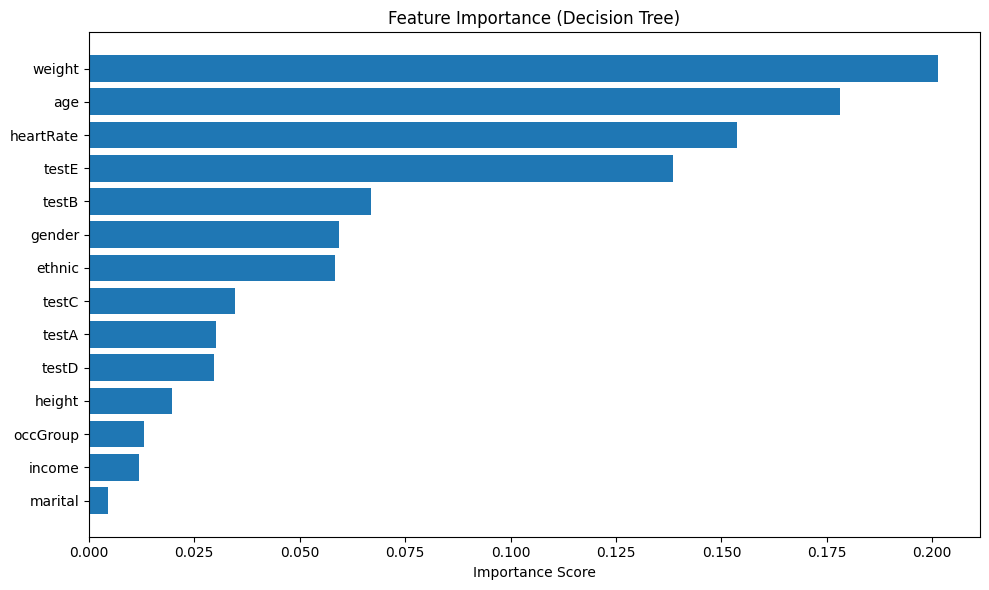

In [90]:
feature_names_dt = x_train.columns

# Feature importance 
importances = dt.feature_importances_

# Create Data frame 
feature_dt = pd.DataFrame({
    'Feature': feature_names_dt,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot 
plt.figure(figsize=(10, 6))
plt.barh(feature_dt['Feature'], feature_dt['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance (Decision Tree)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

K-Nearest Neighbors Model 

In [86]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [87]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.83

In [88]:
knn_pred = knn.predict(x_test)
accuracy_score(y_test, knn_pred)

0.83